In [18]:
import pandas as pd
import plotly.express as px
import streamlit as st

In [19]:
df = pd.read_csv("fatalities_isr_pse_conflict_2000_to_2023.csv")

In [20]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


# 2. Important information

In [21]:
citizenship_counts = df['citizenship'].value_counts()
event_location_region = df['event_location_region'].value_counts()
hostilities_counts = df[df['took_part_in_the_hostilities'] == 'Yes']['citizenship'].value_counts()
no_hostilities_counts = df[df['took_part_in_the_hostilities'] == 'No']['citizenship'].value_counts()

# Number of events
num_events = len(df)

# Types of weapons used
weapons_used = df['ammunition'].value_counts()


# Types of fires

<Axes: xlabel='type_of_injury'>

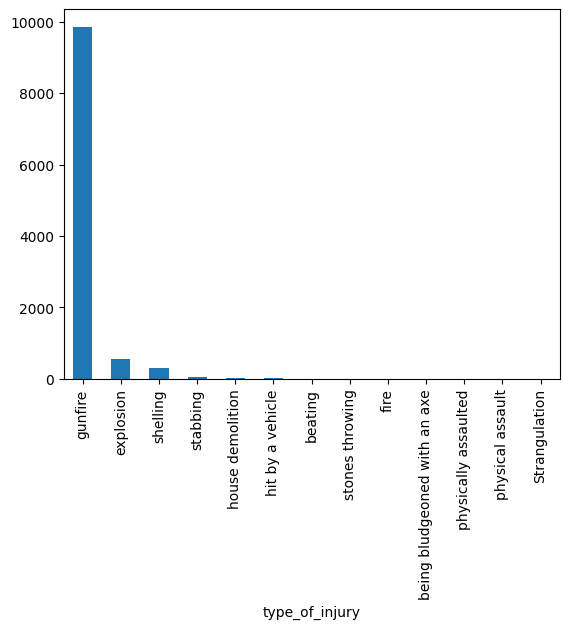

In [22]:
df['type_of_injury'].value_counts().plot(kind='bar')

# Group data by 'gender' 


<Axes: xlabel='gender'>

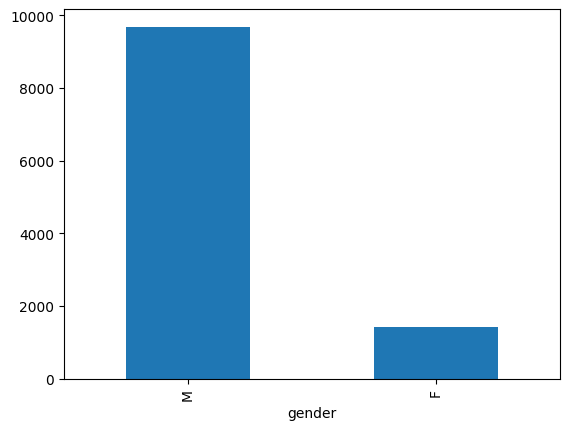

In [23]:
df['gender'].value_counts().plot(kind='bar')

# Calculate summary statistics for 'age'

In [24]:
df.age.describe()

count    10995.000000
mean        26.745703
std         13.780548
min          1.000000
25%         19.000000
50%         23.000000
75%         31.000000
max        112.000000
Name: age, dtype: float64

# Group data by 'event_location_region' and count incidents


<Axes: xlabel='event_location_region'>

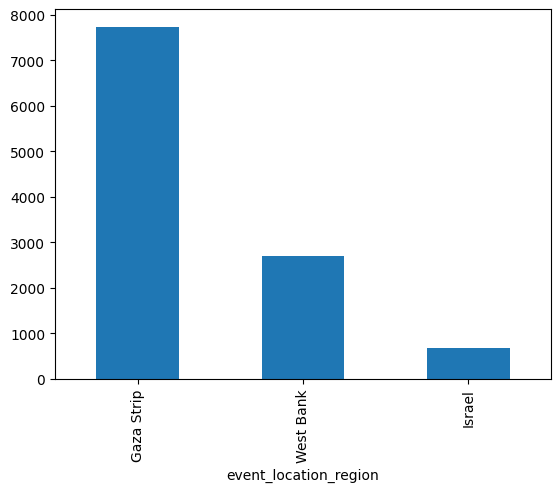

In [25]:
df['event_location_region'].value_counts().plot(kind='bar')

 # Count unique values of 'place_of_residence' within each region

<Axes: ylabel='place_of_residence'>

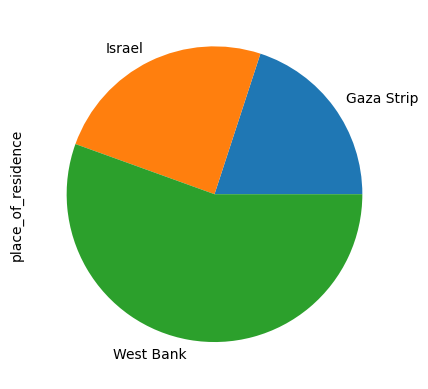

In [26]:
df.groupby('event_location_region')['place_of_residence'].nunique().plot(kind='pie')

# Calculate average age by 'event_location_region'


In [27]:
df.groupby('event_location_region')['age'].mean()

event_location_region
Gaza Strip    26.020224
Israel        36.286776
West Bank     26.421746
Name: age, dtype: float64

# Visualize the types of injuries using Matplotlib

<Axes: ylabel='count'>

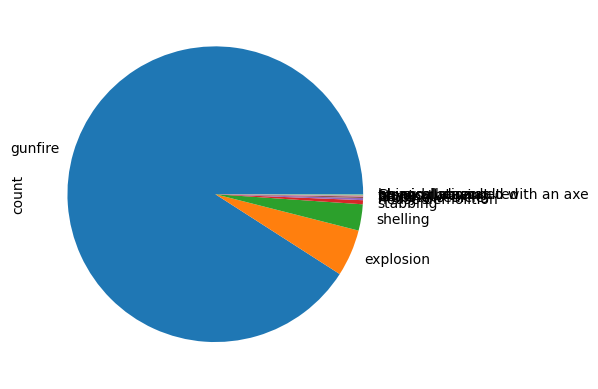

In [28]:
df['type_of_injury'].value_counts().plot(kind='pie')

# Grouping by 'citizenship' to find out how many incidents involve each nationality


In [29]:
# df.groupby('citizenship').size().reset_index(name='incident_count')
def nationality_incident(df):
    nationalityIncident = df.groupby('citizenship').size().reset_index(name='incident_count')
    return nationalityIncident
nationality_incident(df)

,citizenship,incident_count
0,American,1
1,Israeli,1029
2,Jordanian,2
3,Palestinian,10092


In [30]:
def count_fatalities_by_region(df, date_col='date_of_death', region_col='event_location_region'):
    """
    Count fatalities by region based on occurrences of the date of death column.

    Args:
    df (pd.DataFrame): The data frame with fatality data.
    date_col (str): Column name representing the date of fatality.
    region_col (str): Column name representing the region/location.

    Returns:
    pd.DataFrame: DataFrame with total fatality counts by region.
    """
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

    fatalities_count = df.groupby(region_col).size().reset_index(name='fatality_count')
    return fatalities_count

location_fatalities = count_fatalities_by_region(df)


2024-10-31 10:04:56.952 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-31 10:04:57.543 
  command:

    streamlit run C:\Users\Comfort Adiela\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-31 10:04:57.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-31 10:05:01.206 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-31 10:05:01.206 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-31 10:05:01.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-31 10:05:01.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

 # Data filtering example: Incidents in a specific region with specific characteristics

In [32]:
df[(df['event_location_region']=='West Bank') & (df['type_of_injury']=='gunfire')]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,NaN,Israeli civilians,Killed by a settler from Itamar while harvesti...
11121,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.


# Grouping by 'gender' to analyze how incidents vary between males and females


In [33]:
# df.groupby('gender').size().reset_index(name='incident_count')
df.groupby('gender').size().reset_index(name='incident_count')

,gender,incident_count
0,F,1423
1,M,9681


# Combining grouping and filtering 


In [34]:
df[(df['citizenship'] == 'Palestinian') & (df['type_of_injury'] == 'stones throwing')].groupby('gender')['age'].mean()

gender
F    45.0
M    47.0
Name: age, dtype: float64

# Time-based analysis (grouping by year and month)


In [ ]:
import seaborn as sns
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['year'] = df['date_of_event'].dt.year
df['month'] = df['date_of_event'].dt.month_name()  # Format month as month name
time_events = df.groupby(['year', 'month']).size().reset_index(name='incident_count')
time_events['year_month'] = time_events['month'] + ' ' + time_events['year'].astype(str)
time_events

,year,month,incident_count,year_month
0,2000,December,10,December 2000
1,2000,November,17,November 2000
2,2000,October,8,October 2000
3,2001,April,4,April 2001
4,2001,August,26,August 2001
...,...,...,...,...
262,2023,July,25,July 2023
263,2023,June,24,June 2023
264,2023,March,25,March 2023
265,2023,May,53,May 2023


# Grouping and Pivot Tables: 
Pivot table that shows the average age of individuals by gender and nationality.


<Axes: xlabel='citizenship'>

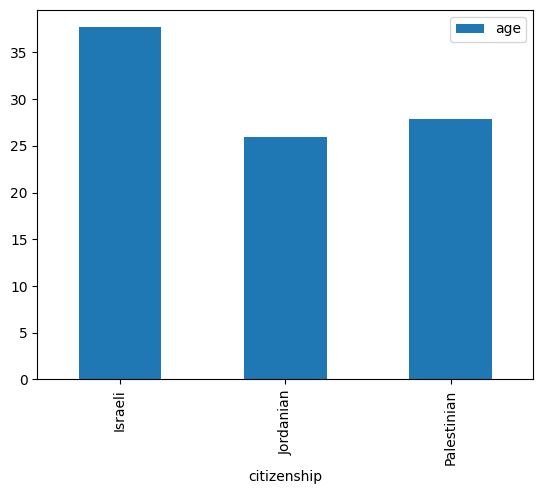

In [36]:
# Calculate average age for female (F) citizens
female_age = pd.pivot_table(df[df['gender'] == 'F'], values='age', index=['citizenship'], aggfunc='mean')
female_age.plot(kind='bar')

<Axes: xlabel='citizenship'>

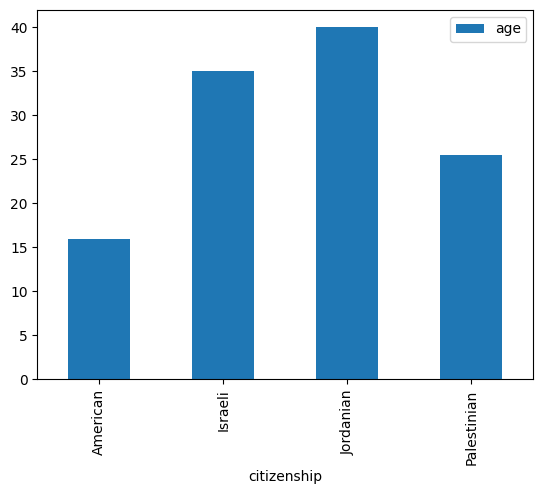

In [37]:
# Calculate average age for male (M) citizens
male_age = pd.pivot_table(df[df['gender'] == 'M'], values='age', index=['citizenship'], aggfunc='mean')
male_age.plot(kind='bar')

# Filtering with Multiple Conditions:


In [38]:
df[(df['citizenship'] == 'Palestinian') & (df['gender'] == 'F') & (df['type_of_injury'] == 'gunfire')] [['citizenship','gender','type_of_injury']]


,citizenship,gender,type_of_injury
73,Palestinian,F,gunfire
114,Palestinian,F,gunfire
121,Palestinian,F,gunfire
122,Palestinian,F,gunfire
124,Palestinian,F,gunfire
...,...,...,...
10923,Palestinian,F,gunfire
10928,Palestinian,F,gunfire
10937,Palestinian,F,gunfire
10939,Palestinian,F,gunfire
